# Mini Project Decision Trees
## DTSC 615 
## Rasheed Martin

## Description of Data:
There are 150 cases in the Iris dataset, and each instance has one target variable (species) and four attributes (sepal length, sepal width, petal length, and petal width). The objective is to identify the iris flower species from the measurements.

## Description of Classification Task
Predicting the species of iris flowers (setosa, versicolor, or virginica) based on their measurements is the classification task. Given that decision trees are simple to use and straightforward, they are an appropriate model for testing with this set of data. This is because decision trees can be useful in understanding the relationship between the target variable and the features.

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [119]:
%matplotlib inline

In [120]:
dataset = pd.read_csv("/Users/rashe/Downloads/IRIS.csv")
# Making pandas read the dataset in csv format

In [121]:
dataset.shape
# obtaining the dimensions of the dataset

(150, 5)

In [122]:
dataset.head()
# Seeing the first 5 lines of the dataset aka the head 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


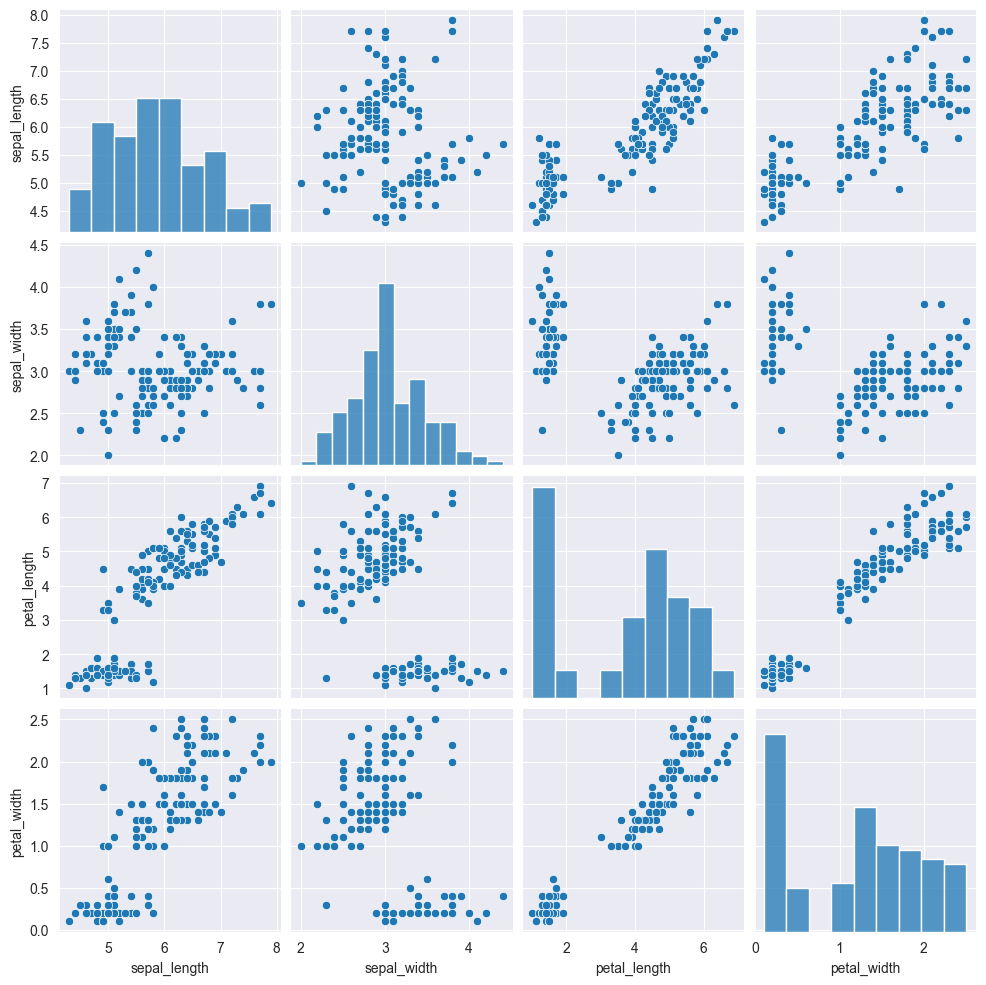

In [123]:
sns.pairplot(dataset)
# Visualization of data with classification labels just attributes 

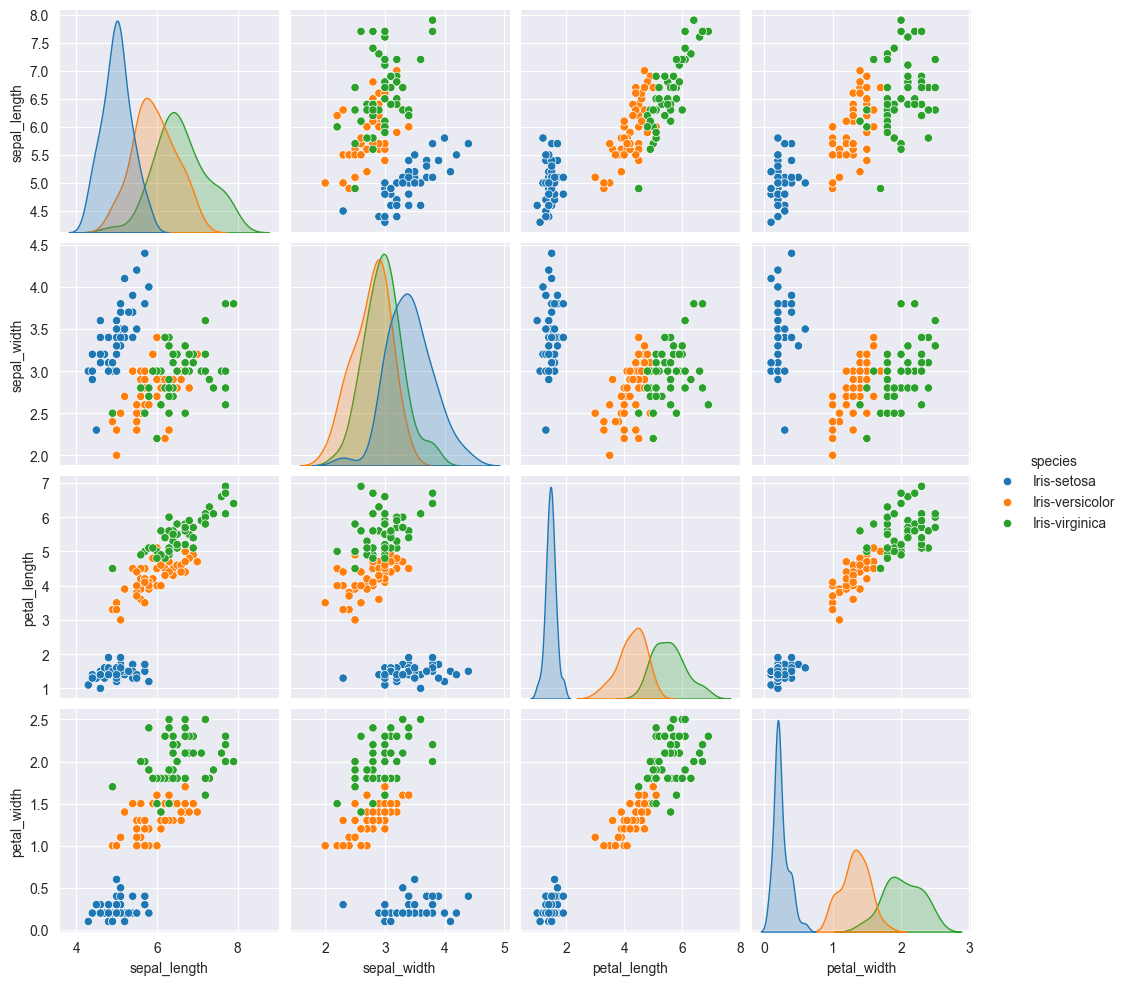

In [124]:
sns.pairplot(dataset, hue = 'species')
# visualization of the dataset with attributes and labels

In [125]:
x = dataset.drop('species', axis = 1)
y = dataset['species']
# x will contain all the columns from the dataset except for species which is our target variable (attribute set)
# y will contain the values from the species column (label)

In [126]:
from sklearn.model_selection import train_test_split
# using the scikit-learn package and model selection library you can randomly split the data into training and testing sets

In [127]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.5)
# This is going to split up 50% of the data into the test set and 50% for training

In [128]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
# The fit method is going to train the algorithm on the training data

DecisionTreeClassifier()

In [129]:
# Our classifier has been trained. Time to make predictions on the test data. 
y_pred = classifier.predict(x_test)

In [130]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
# This is how you see how accurate the algorithm is

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        21
Iris-versicolor       1.00      0.96      0.98        25
 Iris-virginica       0.97      1.00      0.98        29

       accuracy                           0.99        75
      macro avg       0.99      0.99      0.99        75
   weighted avg       0.99      0.99      0.99        75


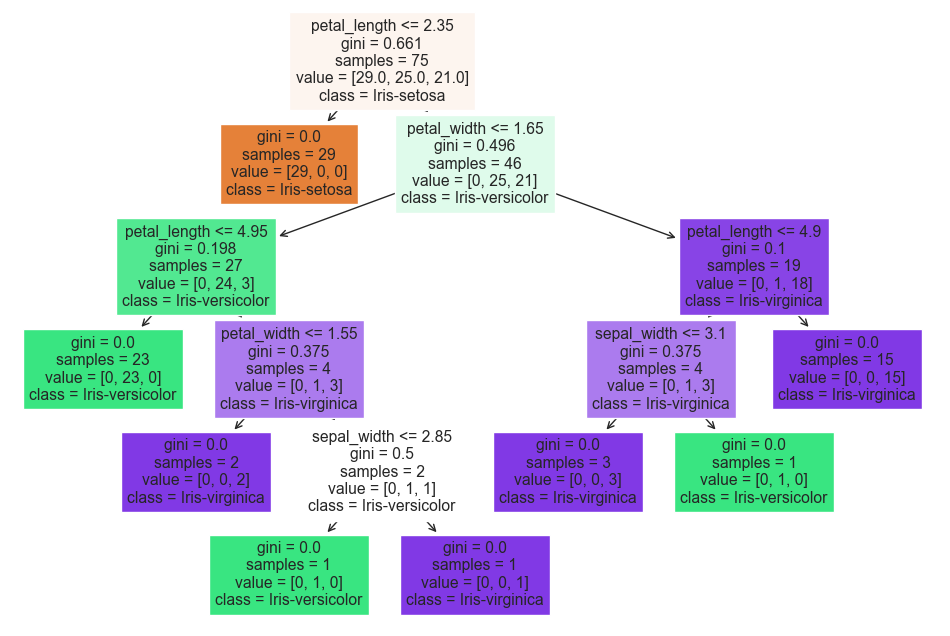

In [131]:
# Visualize the trained decision tree
from sklearn.tree import export_graphviz, plot_tree
plt.figure(figsize=(12, 8))
plot_tree(classifier, filled=True, feature_names=x.columns.values, class_names=dataset['species'].unique())
plt.show()

The number of levels or in other words the depth of this decision tree is not hard to interpret. There are two small leaves on depth level 2 and 3. The interpretation of the leaf in level 2 is the petal length is smaller than 2.45 cm then it would be an iris-setosa. The interpretation of the leaf in level 3 is where the petal length is more than 2.45 cm and the petal width is more than 1.75 then the classification is a iris-virginica. 

## Experiment with Max_depth
### The Hypothesis
The changing of the max_depth parameter will affect the accuracy of the model. I believe will come with some tradeoffs. Just by looking at the decision tree visual that I generated, having a small max depth (ex.: 2) will simplify the model but may make it less accurate. However increasing the max depth will increase complexity but may cause it to be inaccurate as well. 


In [132]:
# Lets have a max depth of [2, 6]
classifier1 = DecisionTreeClassifier(max_depth=2)
classifier2 = DecisionTreeClassifier(max_depth=3)
classifier3 = DecisionTreeClassifier(max_depth=4)

# Train the data
classifier1.fit(x_train, y_train)
classifier2.fit(x_train, y_train)
classifier3.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=4)

In [133]:
# Testing our new data
y_pred1 = classifier1.predict(x_test)
y_pred2 = classifier2.predict(x_test)
y_pred3 = classifier3.predict(x_test)

In [134]:
print(classification_report(y_test, y_pred1))
print(classification_report(y_test, y_pred2))
print(classification_report(y_test, y_pred3))
# This is how you see how accurate the algorithm is

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        21
Iris-versicolor       0.89      0.96      0.92        25
 Iris-virginica       0.96      0.90      0.93        29

       accuracy                           0.95        75
      macro avg       0.95      0.95      0.95        75
   weighted avg       0.95      0.95      0.95        75

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        21
Iris-versicolor       1.00      0.96      0.98        25
 Iris-virginica       0.97      1.00      0.98        29

       accuracy                           0.99        75
      macro avg       0.99      0.99      0.99        75
   weighted avg       0.99      0.99      0.99        75

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        21
Iris-versicolor       0.96      0.96      0.96        25
 Iris-virginica       0.

Analyzing the results of the experiment, it looks like the max_depth of 3 has actually improved the accuracy of the model. The max depth of 2 is less accurate due to underfitting and max depth of 4 is either less or stagnant in accuracy due to overfitting. The performance of the model is based on the metrics of precision, recall and f1-score.   